<a href="https://colab.research.google.com/github/avrland/polishNewsTitleDatabase/blob/main/Stats_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting data
We fetch data to analyse here from my github, then first first few lines and file stats.

In [3]:
import numpy as np
import os
#Open file and read first 10 news
!pip install wget
import wget
from collections import Counter
import collections

url = 'https://raw.githubusercontent.com/avrland/polishNewsTitleDatabase/main/titles.txt'
wget.download(url, '/content/titles.txt')
filename = '/content/titles.txt'  

file_size = os.path.getsize(filename)
file_size = round(file_size / (1024 * 1024), 3)
print("File Size is :", file_size, "MB")

f = open(filename, "r")
x = len(f.readlines())
print("Titles amount: " + str(x))

f = open(filename, "r")
p1 = Counter(f.read().split())
amount = len(list(p1.elements()))
print("Amount of words: " + str(amount))

with open(filename) as fn:  
  ln = fn.readline()
  lncnt = 0
  while lncnt < 5:
       print("Line {}: {}".format(lncnt, ln.strip()))
       ln = fn.readline()
       lncnt += 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
File Size is : 6.017 MB
Titles amount: 79581
Amount of words: 852260
Line 0: 
Line 1: Polka straciła 36 tys. zł: napastnik wykiwał zarówno ją, jak i bank
Line 2: Chrome 86 na Androida pozwoli zaplanować pobieranie. Można już testować
Line 3: Poczta Polska i cyfrowa rewolucja. Identyfikacja RFID przyspieszy wysyłki
Line 4: GOG GALAXY 2.0 łączy siły z Epic Games Store. Jest wreszcie oficjalna integracja


# Counter mode - preparing data
We cut here words shorten than 4 characters.

In [ ]:
from collections import Counter
import numpy as np
import collections
import os

f = open(filename, "r")
p1 = Counter(f.read().split())

y = 0
for x in range(6000):
  y += 1
  print("Pętla nr: " + str(y))
  if len(list(p1.elements())[x]) <= 3:
    del p1[list(p1.elements())[x]]
print(p1)
p1 = p1.most_common(40)
labels, values = zip(*p1)

## Counter mode - trend tree
We show there stats with trend tree.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(0.0, 100.0, 0.0, 100.0)

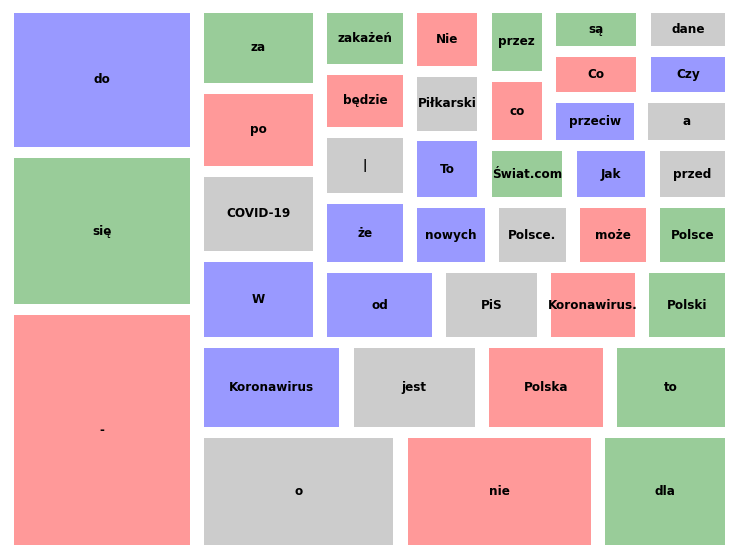

In [ ]:
# libraries
import matplotlib.pyplot as plt
!pip install squarify
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd

# plot it
fig = plt.figure(figsize=(13,10))
test = squarify.plot(sizes=values, label=labels, alpha=.4, text_kwargs={'fontsize':12, 'weight':'bold'}, color=["red","green","blue", "grey"], pad=True)
plt.axis('off')


# Wordcloud

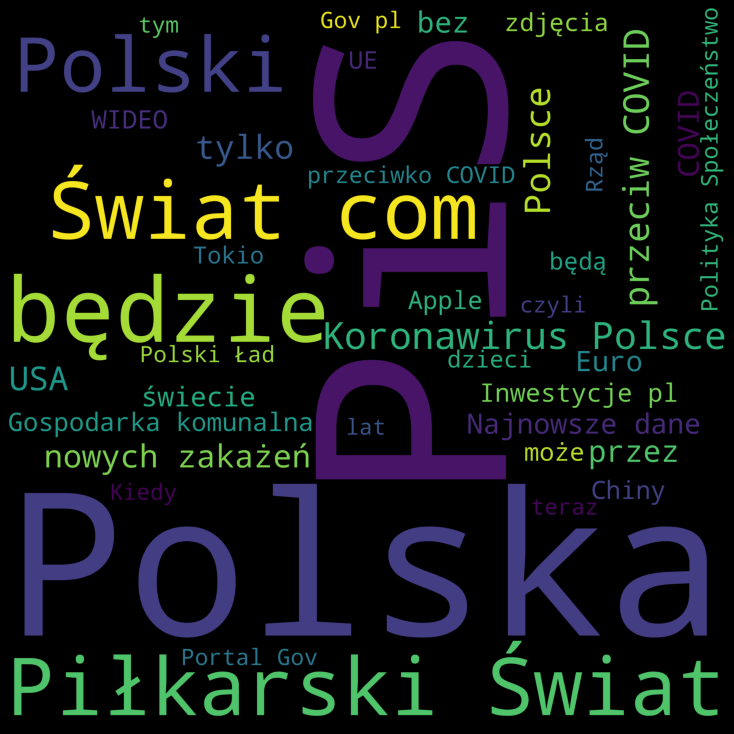

In [77]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt


with open("titles.txt", "r") as file:
 text = str(file.read())

# Create the wordcloud object
wordcloud = WordCloud(width=4000, height=4000, margin=0, max_words = 40, stopwords = ['dla', 'jest', 'chce', 'Tak', 'jak', 'od', 'że', 'na', 'nie', 'czy', 'się', 'do', 'to', 'po', 'już', 'ale', 'ma', 'za', 'są', 'co', 'Pi']).generate(text)

# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()